<a href="https://colab.research.google.com/github/dipbanik/AIML-Training/blob/develop/Thompson_Sampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2019-04-05 00:18:26--  https://raw.githubusercontent.com/dipbanik/AIML-Training/develop/Reinforcement%20Learning/Ads_CTR_Optimisation.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200050 (195K) [text/plain]
Saving to: ‘Ads_CTR_Optimisation.csv’

Ads_CTR_Optimisatio 100%[===================>] 195.36K  --.-KB/s    in 0.02s   

2019-04-05 00:18:27 (8.77 MB/s) - ‘Ads_CTR_Optimisation.csv’ saved [200050/200050]



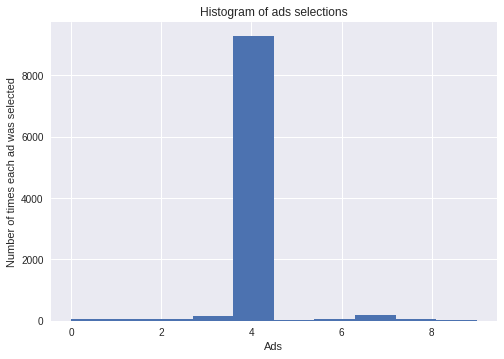

In [2]:
# Thompson Sampling

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

!wget -nc https://raw.githubusercontent.com/dipbanik/AIML-Training/develop/Reinforcement%20Learning/Ads_CTR_Optimisation.csv
# Importing the dataset
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

# Implementing Thompson Sampling
import random
N = 10000
d = 10
ads_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
    else:
        numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
    total_reward = total_reward + reward

# Visualising the results - Histogram
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()